# Гипотезы, A/B-тест для интернет-магазина

# Задачи:  
  
1. Приоритизировать гипотезы для увеличения выручки, выдвинутые совместно с отделом маркетинга.  
2. Запустить A/B-тест и проанализировать результаты.  
  
Часть 1. Приоритизация гипотез  
  
•	Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
•	Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
•	Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.  
  
Часть 2. Анализ A/B-теста  
  
1.	Построить график кумулятивной выручки по группам. Сделать выводы и предположения.  
2.	Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.  
3.	Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения. 
4.	Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.  
5.	Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.  
6.	Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.  
7.	Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  
8.	Построить точечный график стоимостей заказов. Сделать выводы и предположения.  
9.	Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  
10.	Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения. 
11.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.  
12.	Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.  
13.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.  
14.	Принять решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.  




## Приоритизация гипотез

In [1]:
# загрузим библиотеки, переведем данные о гипотезах в переменнe., выведем данные на экран и изучим их
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import random
import numpy as np
import seaborn as sns
from scipy import stats as st
import scipy.stats as stats
from plotly import graph_objects as go
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  

hypothesis_data = pd.read_csv('/datasets/hypothesis.csv')

display(hypothesis_data)




,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [2]:
# настроим датафрейм так, чтобы гипотезы  отображались полностью
pd.set_option('max_colwidth', 400)
display(hypothesis_data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# приведем названия колонок к нижнему регистру
hypothesis_data.columns = hypothesis_data.columns.str.lower()
display(hypothesis_data)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Всего 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета**

In [4]:
hypothesis_data['ICE'] = hypothesis_data['impact'] * hypothesis_data['confidence'] / hypothesis_data['efforts']

display(hypothesis_data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


При применении фреймворка ICE наиболее перспективными являются гипотезы:  
- Запустить акцию, дающую скидку на товар в день рождения  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  

**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета**

In [5]:
hypothesis_data['RICE'] = hypothesis_data['reach'] * hypothesis_data['impact'] * hypothesis_data['confidence'] / hypothesis_data['efforts']

display(hypothesis_data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении фреймворка RICE наиболее перспективными являются гипотезы:  
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Text(0.5, 1.0, 'Приоритизация гипотез ICE')

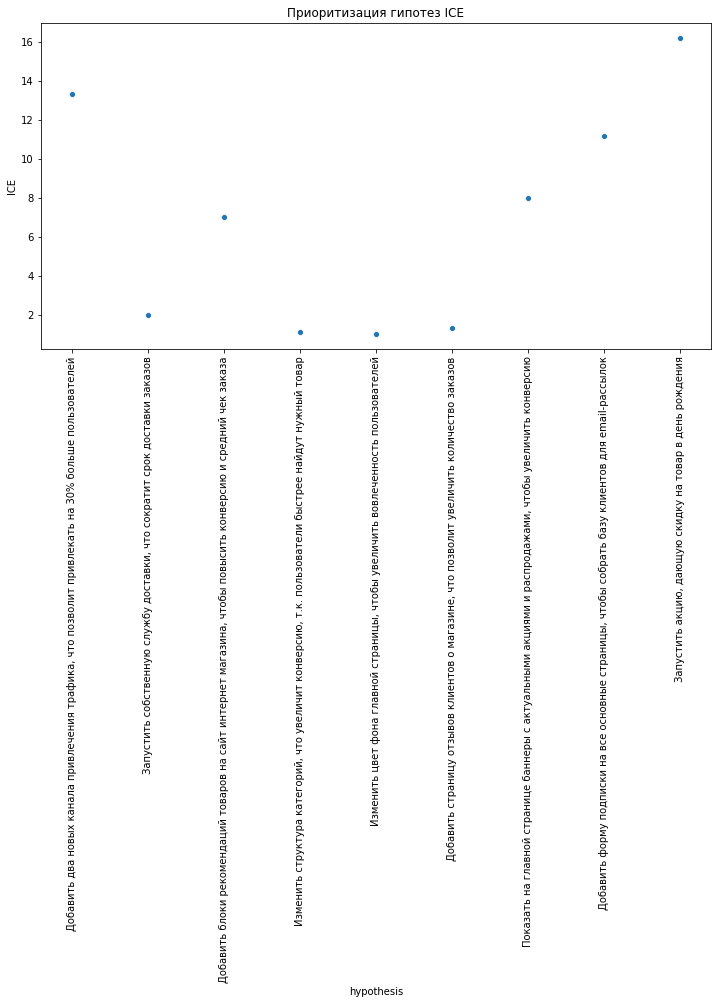

In [6]:
hypothesis_data['ICE'] = hypothesis_data['impact'] * hypothesis_data['confidence'] / hypothesis_data['efforts']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hypothesis', y='ICE', data=hypothesis_data)
plt.xticks(rotation=90)
plt.title('Приоритизация гипотез ICE')

Text(0.5, 1.0, 'Приоритизация гипотез RICE')

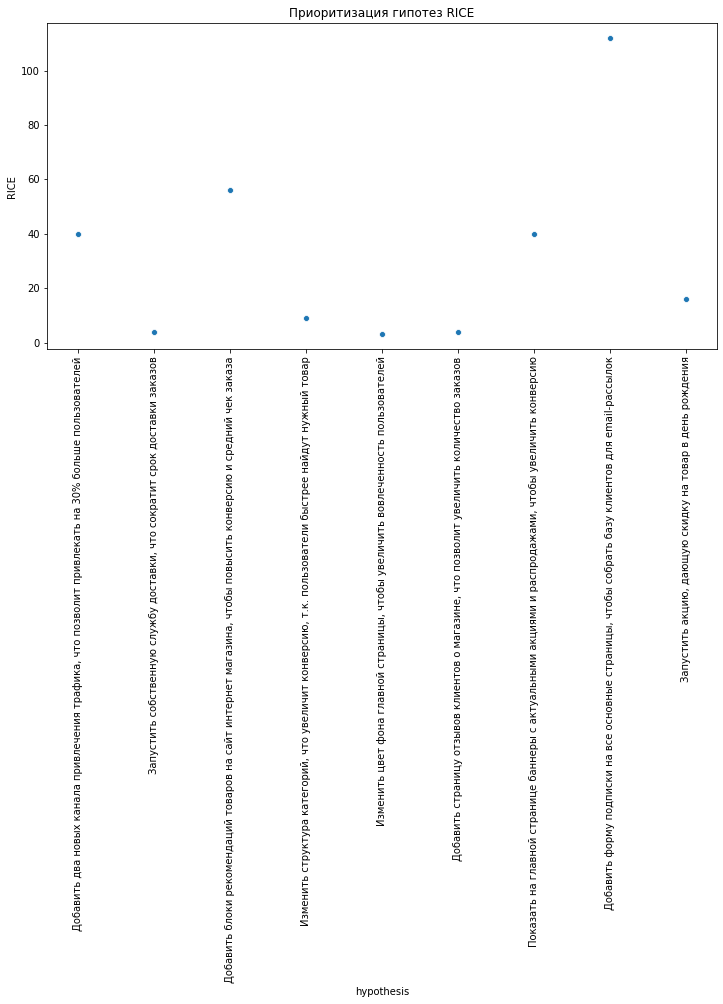

In [7]:
hypothesis_data['RICE'] = hypothesis_data['reach'] * hypothesis_data['impact'] * hypothesis_data['confidence'] / hypothesis_data['efforts']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hypothesis', y='RICE', data=hypothesis_data)
plt.xticks(rotation=90)
plt.title('Приоритизация гипотез RICE')

**Вывод**   

Одинаковые приоритетные гипотезы, полученные обоими методами:  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ICE - 2 место, RICE - 3 место)  
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(ICE - 3 место, RICE - 1 место)    
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (оба метода - 4 место)  
  
При этом по методу ICE наиболее перспективна гипотеза "Запустить акцию, дающую скидку на товар в день рождения", а по методу RICE второе место занимает гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".  
  
RICE отличается от ICE охватом, то есть приотритетные гипотезы, отсортированные методом RICE, при реализации повлияют на большее количество клиентов. Поэтому гипотеза "Запустить акцию, дающую скидку на товар в день рождения" по методу RICE занимает всего лишь 5 место, тогда как по методу ICE - первое. То есть такое нововведение может быть эффективным, но будет использоваться клиентом максимум 1 раз в году.  


## Анализ A/B-теста  

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения

In [8]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

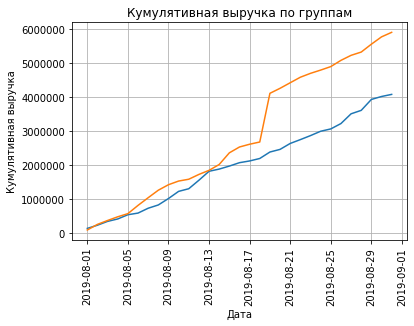

<Figure size 1296x576 with 0 Axes>

In [9]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('Кумулятивная выручка по группам')
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=90)
plt.figure(figsize=(18, 8))
plt.show()


**Вывод:**  
В группе В происходит резкий скачок кумулятивной выручки, дальше она продолжает расти, в то время как в группе А кумулятивная выручка постоянно растет линейно. Возможно, причина в выбросах, необходим дальнейший анализ.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

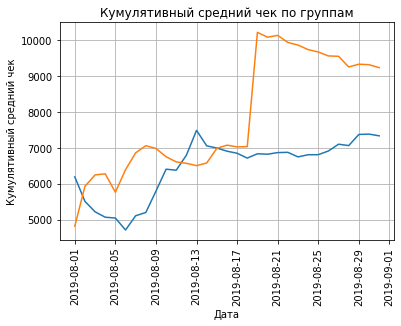

<Figure size 1296x576 with 0 Axes>

In [10]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.figure(figsize=(18, 8))
plt.show()


**Вывод:**  
В группе В происходит резкий скачок кумулятивного среднего чека, а затем он начинает постепенно снижаться, в то время как в группе А кумулятивный средний чек сначала растет, а потом держится примерно на одном уровне. Возможно, причина в выбросах, необходим дальнейший анализ.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.


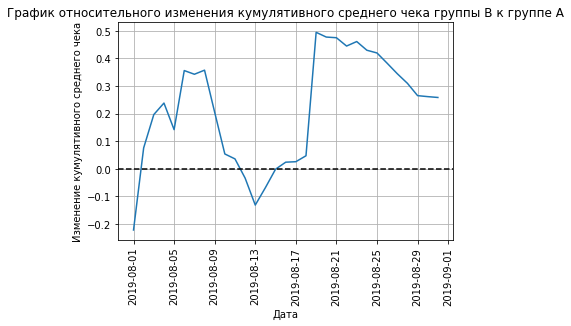

<Figure size 1296x576 with 0 Axes>

In [11]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.figure(figsize=(18, 8))
plt.show()


**Вывод:**
Результаты теста имеют 2 пика и 1 резкое падение. Возможно, это произошло в даты аномальных заказов.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

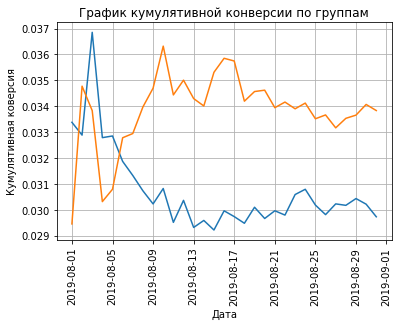

<Figure size 1296x576 with 0 Axes>

In [12]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.grid()
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Кумулятивная коверсия')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.figure(figsize=(18, 8))
plt.show()



**Вывод:**  
В начале тестирования у обеих групп происходит скачок в кумулятивной конверсии.  
В группе В кумулятивная конверсия остается на довольно высоком уровне, но постепенно снижается.  
В группе А кумулятивная конверсия держится на довольно низком уровне, но видна тенденция к ее росту.  

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.   Сделаем выводы и предположения.


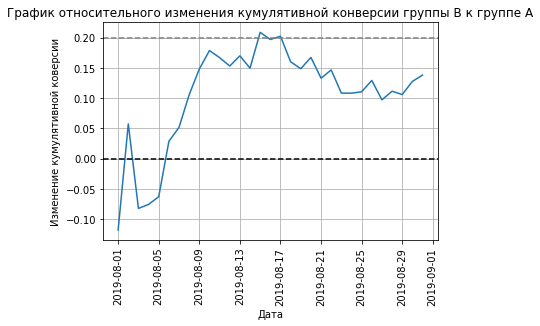

<Figure size 1296x576 with 0 Axes>

In [13]:
mergedCumulativeConversions=cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date',suffixes=['A','B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.grid()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Изменение кумулятивной коверсии')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.figure(figsize=(18, 8))
plt.show()

**Вывод:**  
Конверсия группы В явно выше, но срок тестирования довольно маленький - месяц.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.


       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


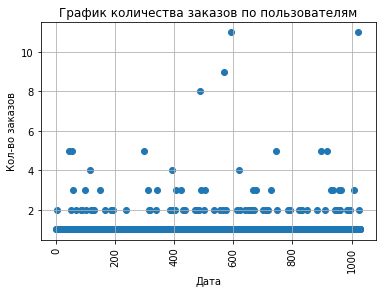

<Figure size 1296x576 with 0 Axes>

In [14]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

plt.grid()
plt.title('График количества заказов по пользователям')
plt.ylabel('Кол-во заказов')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.figure(figsize=(18, 8))
plt.show()


**Вывод:**  
В основном пользователи совершают 1 заказ, но тех, кто совершает 2 заказа тоже довольно много.  
А вот тех, кто совершил 3 более заказов уже значительно меньше.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.


In [15]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Вывод: 95 перцентиль: 2  
99 перцентиль: 4  
Не более 5% пользователей совершали более 2 заказов.  
Не более 1% пользователей совершали более 4 заказов. 

Выберем границу для определения аномальных пользователей - более 2 заказов. 



### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.


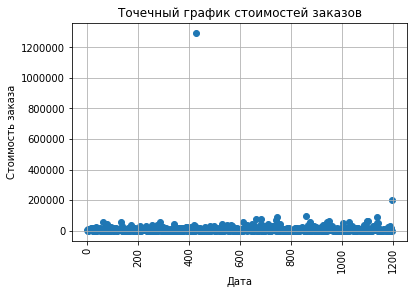

<Figure size 1296x576 with 0 Axes>

In [16]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.figure(figsize=(18, 8))
plt.show()

**Вывод:**  
Есть 2 выброса стоимости заказов: в районе 200 000 и более 1 200 000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.


In [17]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Вывод: Не более, чем к 5% клиентов чек выше 28 000.  
Не более, чем у 1% клиентов чек выше 58 233,2.   

Выберем границу для определения аномальных пользователей - чек выше 28 000. 

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.


**Сформулируем нулевую гипотезу:** "Статистической значимости различий в конверсии между группами по "сырым" данным нет".  
  
**Альтернативная гипотеза:** "Существет статистическая значимость различий в конверсии между группами по "сырым" данным".


In [18]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)




In [19]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, use_continuity=True, alternative='two-sided')[1]))

0.01679


**Вывод:**  
P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем.  
Анализ сырыз данных сообщает, что между группами есть статистически значимые различия.  

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.


**Сформулируем нулевую гипотезу:** "Статистической значимости различий в среднем чеке заказа между группами по "сырым" данным нет".  
  
**Альтернативная гипотеза:** "Существует статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным".


In [20]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], use_continuity=True, alternative='two-sided')[1]))

0.729


**Вывод:**  
P-value больше 0.05 - принимаем нулевую гипотезу: "Статистической значимости различий в среднем чеке заказа между группами по "сырым" данным нет".  


### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.


**Сформулируем нулевую гипотезу:** "Статистической значимости различий в конверсии между группами по "сырым" данным нет".  
  
**Альтернативная гипотеза:** "Существет статистическая значимость различий в конверсии между группами по "сырым" данным".

In [21]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

In [22]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, use_continuity=True, alternative='two-sided')[1]))




0.01304


**Вывод:**  
P-value меньше 0.05 - отвергаем нулевую гипотезу: "Статистической значимости различий в конверсии между группами по "сырым" данным нет".  
Принимаем альтернативную гипотезу: "Существует статистическая значимость различий в конверсии между группами по "сырым" данным".

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.


**Сформулируем нулевую гипотезу:** "Статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным нет".  
  
**Альтернативная гипотеза:** "Существет статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным".

In [23]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            use_continuity=True, 
            alternative='two-sided'
        )[1]
    )
)

0.738


**Вывод:**  
P-value больше 0.05 - принимаем нулевую гипотезу: "Статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным нет".    

### Примем решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Вывод:**  
  
Аргументы за 1.Остановить тест, зафиксировать победу одной из групп:  
- Большинство графиков указывают на преимущество группы В перед группой А.  
  
Аргументы за 2.Остановить тест, зафиксировать отсутствие различий между группами:  
- Нет  
  
Аргументы за 3.Продолжить тест:  
- Маленькая продолжительность тестирования - 1 месяц  
- Графики не вышли на плато  
- 2 гипотезы по наличию статистической значимости приняты, 2 гипотезы отвергнуты  
  
На данном этапе наблюдений мы видим преимущество гуппы В перед группой А.  
Однако продолжительность тестирования очень короткая и графики еще не вышли на плато, поэтому примем решение продолжить тест.